In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from disease_prediction import CardioData

filepath = "cardio_train.csv"
cardio = CardioData()
df = cardio.load_data(filepath)
df = cardio.clean_data()
df = cardio.blood_pressure()
df = cardio.calculate_bmi()

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,blood_category,BMI,BMI_category
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,Unkown,21.967120,Normal_range
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,Unkown,34.927679,Obese (class I)
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,Unkown,23.507805,Normal_range
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,Unkown,28.710479,Over_weight
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,Healty,23.011177,Normal_range


In [2]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              70000 non-null  int64  
 1   age             70000 non-null  int64  
 2   gender          70000 non-null  int64  
 3   height          70000 non-null  int64  
 4   weight          70000 non-null  float64
 5   ap_hi           70000 non-null  int64  
 6   ap_lo           70000 non-null  int64  
 7   cholesterol     70000 non-null  int64  
 8   gluc            70000 non-null  int64  
 9   smoke           70000 non-null  int64  
 10  alco            70000 non-null  int64  
 11  active          70000 non-null  int64  
 12  cardio          70000 non-null  int64  
 13  blood_category  70000 non-null  object 
 14  BMI             70000 non-null  float64
 15  BMI_category    70000 non-null  object 
dtypes: float64(2), int64(12), object(2)
memory usage: 8.5+ MB


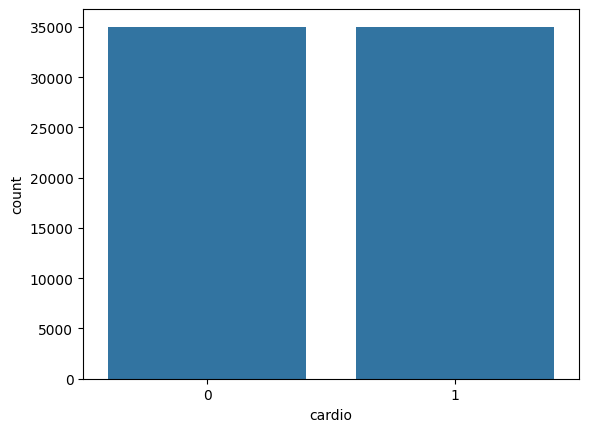

In [4]:
sns.countplot(data=df, x= 'cardio')
plt.show()

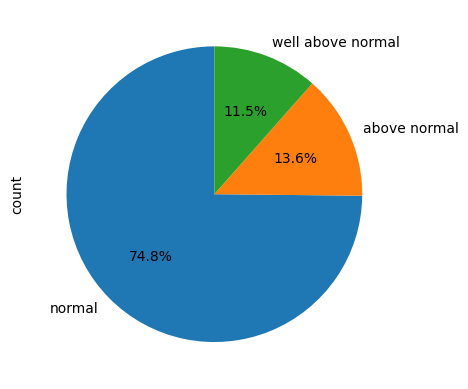

In [5]:
df['cholesterol'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,labels=["normal", "above normal", "well above normal"])
plt.show()

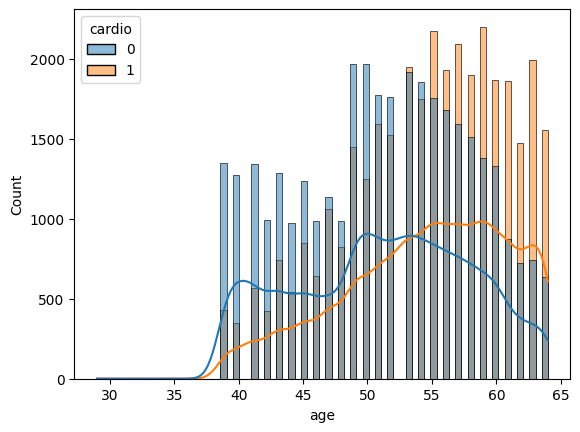

In [6]:

sns.histplot(data=df, x='age', hue='cardio', kde=True)
plt.show()

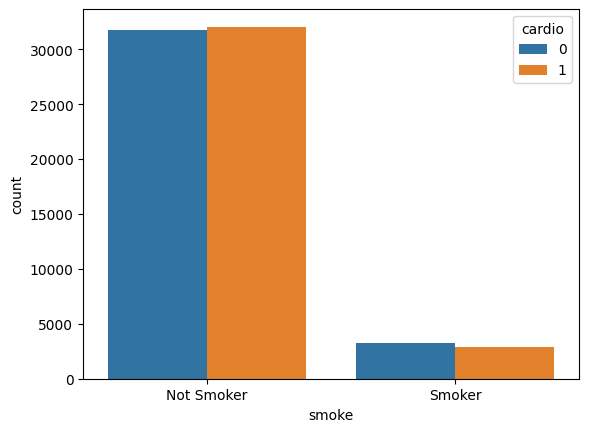

In [7]:

sns.countplot(data=df, x='smoke', hue='cardio')
plt.xticks([0,1], labels= ["Not Smoker", "Smoker"])
plt.show()

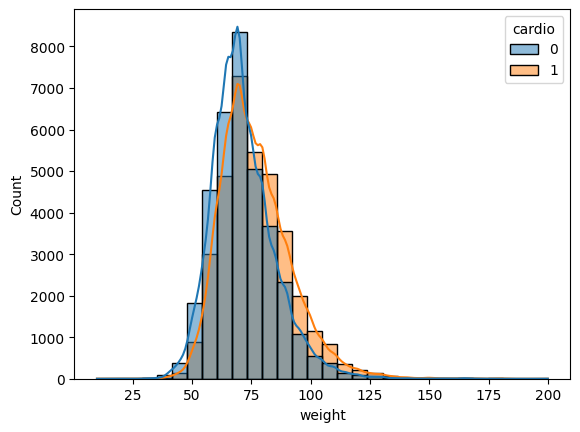

In [8]:
sns.histplot(df , x= 'weight', hue='cardio', bins= 30, kde=True)
plt.show()

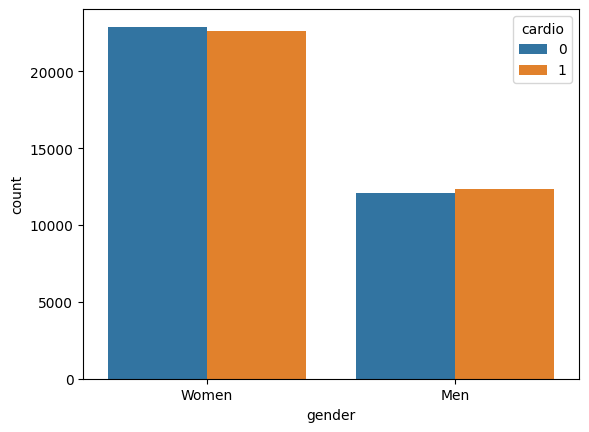

In [9]:
sns.countplot(data = df, x='gender', hue='cardio')
plt.xticks([0, 1], labels=['Women', 'Men'])
plt.show()

<Axes: xlabel='alco', ylabel='count'>

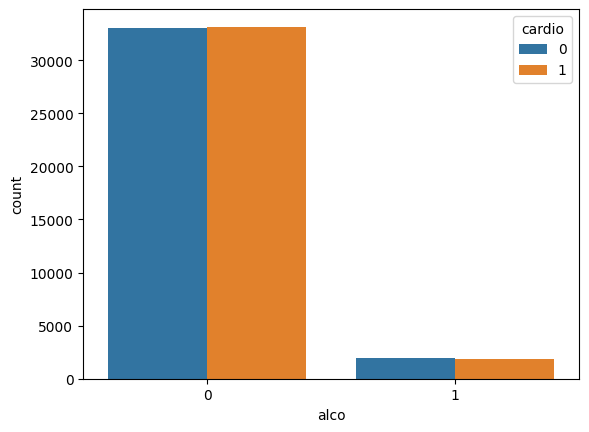

In [10]:
sns.countplot(data= df, x='alco', hue='cardio')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Under_weight'),
  Text(1, 0, 'Normal_range'),
  Text(2, 0, 'Over_weight'),
  Text(3, 0, 'Obese (class I)'),
  Text(4, 0, 'Obese (class II)')])

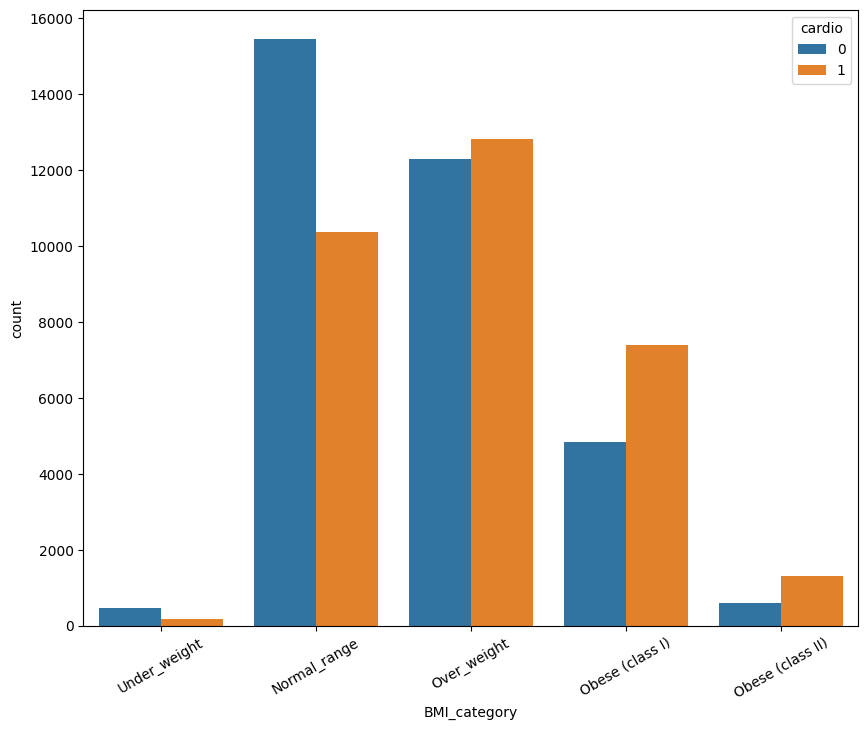

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='BMI_category', hue='cardio', order=['Under_weight','Normal_range','Over_weight','Obese (class I)','Obese (class II)','Obese (class III)'])
plt.xticks(rotation =30)